**** Indian Liver Patient Records
Patient records collected from North East of Andhra Pradesh, India****

**Context**

Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

**Content**

This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import itertools
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['indian_liver_patient.csv']


In [2]:
data=pd.DataFrame(pd.read_csv('../input/indian_liver_patient.csv'))

In [3]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


I tried to understand the attributes

**Total Bilirubin (Blood) / Total serum bilirubin, TSB **

* Measure of total amount of bilirubin.
* It is often part of a panel of tests that measure liver function. 
* A small amount of bilirubin in your blood is normal, but a high level may be a sign of liver disease.
* Test results may vary depending on your age, gender, health history, the method used for the test, and other things.
* Adults with jaundice generally have bilirubin levels greater than 2.5 milligrams per deciliter (mg/dL). 

**Direct Bilirubin/Conjugated bilirubin**

* Bilirubin is also part of bile, which your liver makes to help digest the food you eat.
* Bilirubin that is bound to a certain protein (albumin) in the blood is called unconjugated, or indirect, bilirubin. 
* Conjugated, or direct, bilirubin travels from the liver into the small intestine. 
* A very small amount passes into your kidneys and is excreted in your urine. 
* This bilirubin also gives urine its distinctive yellow color.
* High level indicates liver problems, such as hepatitis, or blockages, such as gallstones.

**An alkaline phosphatase (ALP)**
* Measure of the amount of ALP in your blood. 
* ALP mostly found in the liver, bones, kidneys, and digestive system. 
* When the liver is damaged, ALP may leak into the bloodstream. 
* High levels of ALP can indicate liver disease or bone disorders.

**Aspartate Aminotransferase (AST) **

* Normal ranges are:
* Males: 10 to 40 units/L
* Females: 9 to 32 units/L

**Alamine Aminotransferase**

* A normal ALT test result can range from 7 to 55 units per liter (U/L). 
* Levels are normally higher in men.

**Total Protein**

* The normal range for total protein is between 6 and 8.3 grams per deciliter (g/dL). 

**Albumin**

* A normal albumin range is 3.4 to 5.4 g/dL. 
* grams per deciliter (g/dL).
* If you have a lower albumin level,It can mean that you have liver disease or an inflammatory disease.

**Albumin and Globulin Ratio**
* A normal range of albumin is 39 to 51 grams per liter (g/L) of blood. 
* The normal range for globulins varies by specific type. A normal range for total globulins is 23 to 35 g/L. 
* If your protein level is low, you may have a liver or kidney problem.


**Dataset Feature**

* Value 1  -->  Group 1
* Value 2  -->  Group 2

In [17]:
data.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
122,58,Male,1.7,0.8,188,60,84,5.9,3.5,1.40,2
196,60,Male,2.0,1.1,664,52,104,6.0,2.1,0.53,1
16,38,Male,1.8,0.8,342,168,441,7.6,4.4,1.30,1
154,34,Male,5.9,2.5,290,45,233,5.6,2.7,0.90,1
147,65,Male,0.7,0.1,392,20,30,5.3,2.8,1.10,1


In [6]:
data.shape

(583, 11)

* There is no metrics information about the features

In [7]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


There are 4 missing values in Albumin_and_Globulin_Ratio 

In [8]:
missing_values = data.isnull().sum()
missing_values

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

Lets drop those missing values

In [9]:
data=data.dropna()
data.shape

(579, 11)

* Create new categorical column Health 

In [10]:
print('Number of people in Dataset 1',data[data['Dataset'] == 1].Age.count())
print('Number of people in Dataset 2',data[data['Dataset'] == 2].Age.count())

Number of people in Dataset 1 414
Number of people in Dataset 2 165


**Basic EDA on Labels**

Number of people in Dataset 1 and 2

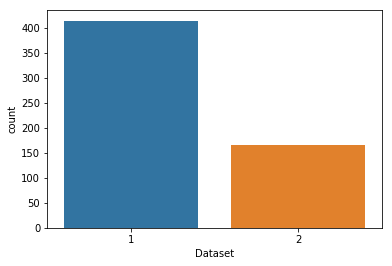

In [11]:
sns.countplot(x='Dataset',data=data)
plt.show()

> Display Datasets by patient gender

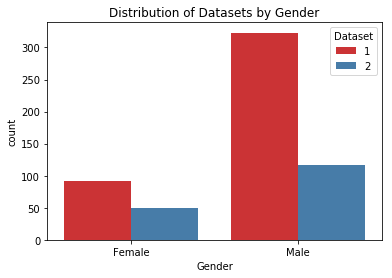

In [12]:
# Gender Distribution of 2 Dataset
sns.countplot(x='Gender',data=data,hue='Dataset',palette="Set1")
plt.title('Distribution of Datasets by Gender')
plt.show()

Okay! There are many males in the dataset 1

**Distribution of features in the whole dataset**

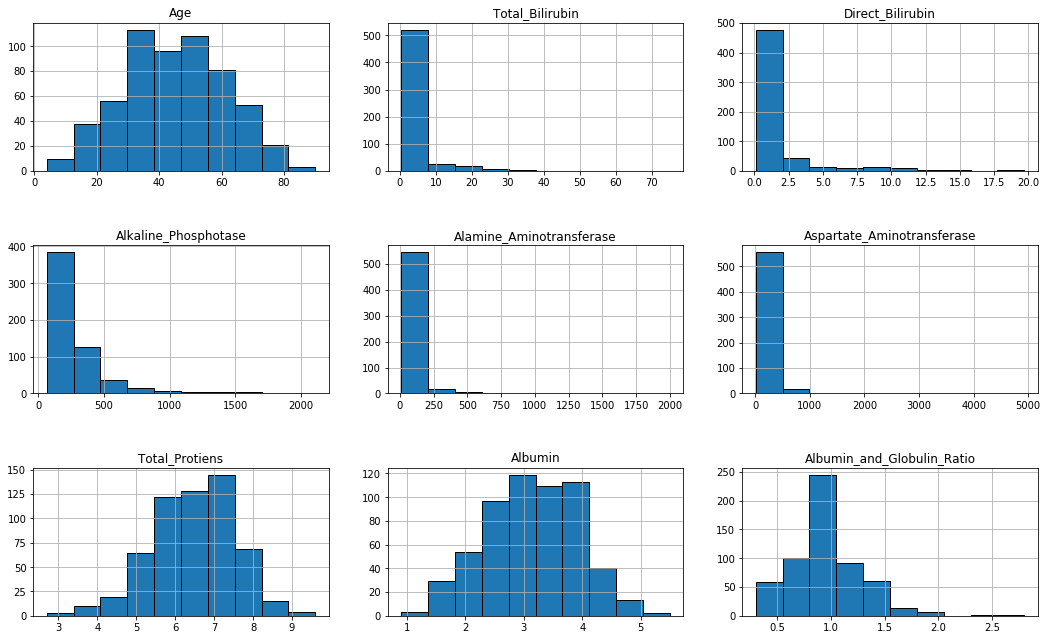

In [22]:
columns=list(data.columns[:10])
columns.remove('Gender')
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    data[i].hist(bins=10,edgecolor='black')#,range=(0,0.3))
    plt.title(i)
plt.show()

*  Check age distribution by sex

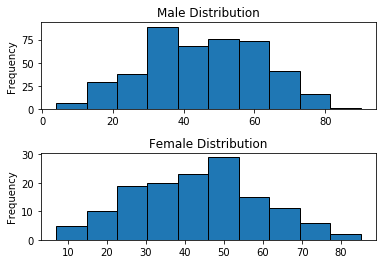

In [14]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1)
plt.subplots_adjust(wspace=0.2,hspace=0.5)
data[data['Gender']=='Male'].Age.plot(ax=ax1, kind='hist', bins=10,edgecolor='black')
ax1.set_title('Male Distribution')
data[data['Gender']=='Female'].Age.plot(ax=ax2, kind='hist',bins=10,edgecolor='black')
ax2.set_title('Female Distribution')
plt.show()

**Distribution of Age by Gender in Dataset 1**

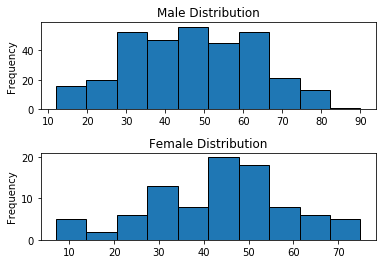

In [15]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1)
plt.subplots_adjust(wspace=0.2,hspace=0.5)
data[(data['Gender']=='Male') & (data['Dataset'] == 1)].Age.plot(ax=ax1, kind='hist', bins=10,edgecolor='black')
ax1.set_title('Male Distribution')
data[(data['Gender']=='Female') & (data['Dataset'] == 1)].Age.plot(ax=ax2, kind='hist',bins=10,edgecolor='black')
ax2.set_title('Female Distribution')
plt.show()

**Distribution of Age by Gender in Dataset 2**

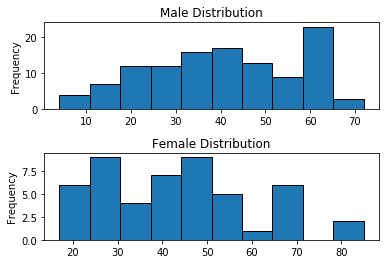

In [16]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1)
plt.subplots_adjust(wspace=0.2,hspace=0.5)
data[(data['Gender']=='Male') & (data['Dataset'] == 2)].Age.plot(subplots=True,ax=ax1, kind='hist', bins=10,edgecolor='black')
ax1.set_title('Male Distribution')
data[(data['Gender']=='Female') & (data['Dataset'] == 2)].Age.plot(subplots=True,ax=ax2, kind='hist',bins=10,edgecolor='black')
ax2.set_title('Female Distribution')
plt.show()

********************************To Be Continued****